<a href="https://colab.research.google.com/github/fmathews11/College_Basketball_Functions/blob/main/Pulling_Gameplan_From_Kenpom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install kenpompy
!pip install mechanicalsoup
import mechanicalsoup,pandas as pd,numpy as np
from bs4 import BeautifulSoup
from kenpompy.utils import login
import seaborn as sns

In [2]:
browser = login()
url = 'https://kenpom.com/gameplan.php?team=Purdue'
browser.open(url)
raw_source = browser.get_current_page()
table = raw_source.find_all('table')
df = pd.read_html(str(table[0]))[0]
df_ = df.copy()

In [14]:
#Let's Clean it up
df = df_.copy()
df.columns = [i[0] +  "_" +i[1] for i in df.columns.tolist()]
df = df.drop([df.columns[i] for i in [1,7,12,14,18]],axis = 1)



#Column name cleaning
[i[:-2] for i in df.columns.tolist() if "." in i]
for i in df.columns:
  if "." in i:
    df = df.rename(columns = {i:i[:-2]})
for i in df.columns:
  if "Unnamed" in i:
    df = df.rename(columns = {i:i.split()[-1]})
for i in df.columns:
  if "level" in i:
   df = df.rename(columns = {i:i.split("_")[-1]})


#Remove Extra Junk From the end
cutoff_value = np.where(df.Date == "Correlations (R x 100)")[0][0]
df = df.iloc[:cutoff_value,:]

#Splitting the results column
result_vals = [i for i in df.Result.tolist()]
df.Result = [str(i[0]) for i in result_vals]
df['Score'] = [str(i.split(',')[-1]) for i in result_vals]

col_names = ['Date',
            'Opponent',
            'Result',
            'Location',
            'Pace',
            'Offense_Eff',
            'Offense_eFG%',
            'Offense_TO%',
            'Offense_OR%',
            'Offense_FTR',
            'Offense_2P%',
            'Offense_3P%',
            'Offense_3PA%',
            'Defense_Eff',
            'Defense_eFG%',
            'Defense_TO%',
            'Defense_OR%',
            'Defense_FTR',
            'Defense_2P%',
            'Defense_2P%',
            'Defense_3P%',
            'Defense_3P%',
            'Defense_3PA%',
            'Score']
df.columns = col_names
df


,Date,Opponent,Result,Location,Pace,Offense_Eff,Offense_eFG%,Offense_TO%,Offense_OR%,Offense_FTR,Offense_2P%,Offense_3P%,Offense_3PA%,Defense_Eff,Defense_eFG%,Defense_TO%,Defense_OR%,Defense_FTR,Defense_2P%,Defense_2P%,Defense_3P%,Defense_3P%,Defense_3PA%,Score
0,Tue Nov 9,Bellarmine,W,H,67,143.7,64.3,19.5,50.0,51.8,60.0,44.4,64.3,100.3,50.9,15.0,20.6,13.6,12-24,50.0,12-35,34.3,59.3,96-67
1,Fri Nov 12,Indiana St.,W,H,73,126.2,60.3,16.5,36.4,55.2,60.5,40.0,34.5,91.9,43.8,16.5,25.0,21.9,19-38,50.0,6-26,23.1,40.6,92-67
2,Tue Nov 16,Wright St.,W,H,75,128.3,60.5,22.7,52.8,31.3,61.5,39.3,41.8,69.5,34.8,20.1,13.9,23.7,13-33,39.4,5-26,19.2,44.1,96-52
3,Sat Nov 20,North Carolina,W,N,77,121.5,63.9,11.8,13.8,36.1,63.2,43.5,37.7,109.7,53.6,18.3,30.8,17.4,19-40,47.5,12-29,41.4,42.0,93-84
4,Sun Nov 21,Villanova,W,N,60,132.5,61.8,18.2,42.9,25.4,59.4,43.5,41.8,122.6,56.0,6.6,27.8,29.3,13-24,54.2,13-34,38.2,58.6,80-74
5,Fri Nov 26,Nebraska Omaha,W,H,67,145.5,65.2,18.0,50.0,40.7,59.5,52.9,28.8,60.0,30.9,13.5,17.0,3.2,12-35,34.3,5-28,17.9,44.4,97-40
6,Tue Nov 30,Florida St.,W,H,68,136.3,69.5,19.1,41.7,23.7,67.6,48.0,42.4,95.2,47.6,19.1,29.7,9.5,18-39,46.2,8-24,33.3,38.1,93-65
7,Fri Dec 3,Iowa,W,H,76,101.3,50.0,22.4,25.0,74.0,41.9,42.1,38.0,92.1,44.4,11.8,15.0,35.5,20-41,48.8,5-21,23.8,33.9,77-70
8,Thu Dec 9,Rutgers,L,A,66,103.7,46.7,16.8,42.1,26.2,51.4,26.9,42.6,106.8,59.4,24.4,20.8,37.5,18-34,52.9,7-14,50.0,29.2,70-68
9,Sun Dec 12,N.C. State,W,N,67,109.3,54.2,18.7,32.4,41.7,64.1,23.8,35.0,96.0,48.4,17.3,17.9,24.2,18-41,43.9,8-21,38.1,33.9,82-72


In [28]:
target_df = df[['Opponent','Defense_Eff']]
target_df.rename(columns = {'Defense_Eff':"Raw_Offensive_Efficiency_Against_Purdue"},inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
import kenpompy.summary as kp
browser = login()
sum_df = kp.get_efficiency(browser,2021)
sum_df_ = sum_df.copy()
sum_df

/usr/local/lib/python3.7/dist-packages/kenpompy/summary.py:63: FutureWarning: The default value of regex will change from True to False in a future version.
  eff_df['Team'] = eff_df['Team'].str.replace('\d+', '')


,Team,Conference,Tempo-Adj,Tempo-Adj.Rank,Tempo-Raw,Tempo-Raw.Rank,Avg. Poss Length-Offense,Avg. Poss Length-Offense.Rank,Avg. Poss Length-Defense,Avg. Poss Length-Defense.Rank,Off. Efficiency-Adj,Off. Efficiency-Adj.Rank,Off. Efficiency-Raw,Off. Efficiency-Raw.Rank,Def. Efficiency-Adj,Def. Efficiency-Adj.Rank,Def. Efficiency-Raw,Def. Efficiency-Raw.Rank
0,Coppin St.,MEAC,76.8,1,79.4,1,14.0,1,16.1,13,91.0,334,91.6,324,102.6,183,100.2,135
1,Eastern Kentucky,OVC,74.8,2,75.6,5,15.4,16,16.1,17,101.0,197,104.5,100,101.5,160,97.3,67
2,South Carolina,SEC,74.6,3,75.3,7,15.2,12,16.7,64,103.9,139,96.3,272,98.9,113,105.1,260
3,The Citadel,SC,74.2,4,74.5,11,15.5,18,16.7,62,104.0,136,104.0,110,109.1,305,110.5,328
4,Monmouth,MAAC,74.2,5,74.4,12,14.6,4,17.8,271,99.0,237,100.4,187,105.1,229,98.3,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Davidson,A10,62.5,353,63.4,344,19.5,338,18.3,338,113.9,20,110.0,25,101.8,164,101.7,177
369,Texas St.,SB,62.4,354,63.6,343,19.9,342,17.4,192,99.6,228,101.4,168,100.8,141,95.6,43
370,Evansville,MVC,62.0,355,62.3,346,21.5,347,16.4,28,105.8,114,102.3,150,109.9,315,109.9,324
371,Mount St. Mary's,NEC,61.6,356,63.6,342,20.1,344,17.4,185,94.5,301,98.4,224,101.1,150,97.2,61


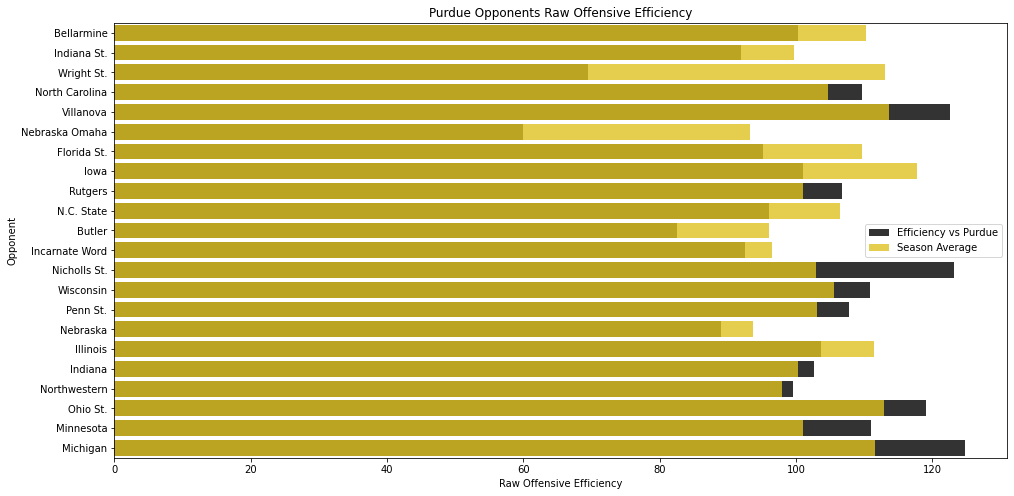

In [67]:
import matplotlib.pyplot as plt
off_dict = dict(zip(sum_df.Team,sum_df['Off. Efficiency-Raw']))
melted = pd.melt(target_df,id_vars = ['Opponent'])
melted.value = melted.value.astype(float)
plt.figure(figsize = (16,8))
g = sns.barplot(data = melted,
            x = "value",
            y = 'Opponent',
            hue = 'variable',
            orient = "h",
            dodge = False,
            palette = ['black','gold'],
            ci = None,
            alpha = 0.8)
plt.legend(labels = ['Efficiency vs Purdue','Season Average'])
plt.title("Purdue Opponents Raw Offensive Efficiency")
plt.xlabel("Raw Offensive Efficiency")
plt.show();

In [56]:
target_df

,Opponent,Raw_Offensive_Efficiency_Against_Purdue,Season_Average_Offensive_Efficiency
0,Bellarmine,100.3,110.3
1,Indiana St.,91.9,99.7
2,Wright St.,69.5,113.0
3,North Carolina,109.7,104.7
4,Villanova,122.6,113.7
5,Nebraska Omaha,60.0,93.2
6,Florida St.,95.2,109.7
7,Iowa,92.1,117.7
8,Rutgers,106.8,101.0
9,N.C. State,96.0,106.5
